In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import statsmodels.api as sm
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
import math

In [3]:
# Import data
data = pd.read_excel("UDJ_S14_Assignements_Harmon_Foods_Case_Assignement_Details.xlsx")
# data.describe()
data.head()

,TIME,Sales,CP,CP(t-1),CP(t-2),DA,DA(t-1),DA(t-2),SeasIndx
0,1,425075,75253,0,0,457732,352872,304004,113
1,2,315305,15036,75253,0,254396,457732,352872,98
2,3,367286,134440,15036,75253,259952,254396,457732,102
3,4,429432,119740,134440,15036,267368,259952,254396,107
4,5,347874,135590,119740,134440,158504,267368,259952,119


#### Correlations

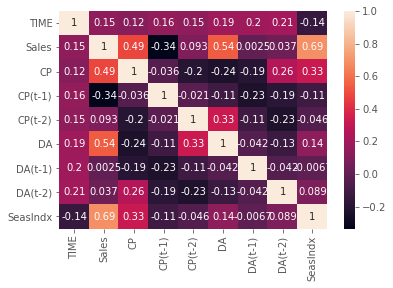

In [4]:
#Generate correlation matrix 
matrix = data.corr()

#Plot as Heatmap
sns.heatmap(matrix, annot=True)
plt.show()

Our dependent varaiable sales is most postively correlated to the indepedant variables: 'CP', 'DA', and 'SeasIndx'. We now visualise the relationships for each of them using individual scatterplots. 

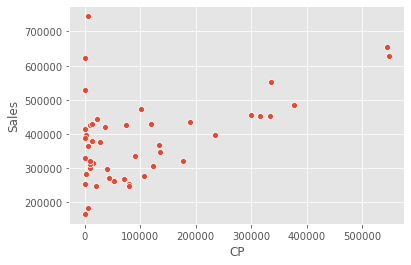

In [5]:
# Visualise scatter plots of CP, DA and SeasIndx
sns.scatterplot(data=data, x="CP", y="Sales")
plt.show()

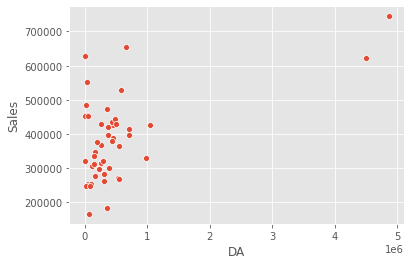

In [6]:
sns.scatterplot(data=data, x="DA", y="Sales")
plt.show()

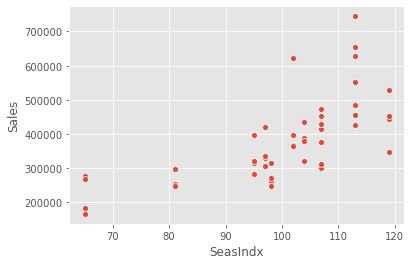

In [7]:
sns.scatterplot(data=data, x="SeasIndx", y="Sales")
plt.show()

In [9]:
y1 = data['Sales']
ivs = data[['CP','DA','SeasIndx']]
X = sm.add_constant(ivs)
lm1 = sm.OLS(y1,X).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     94.92
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           3.06e-19
Time:                        11:28:30   Log-Likelihood:                -581.17
No. Observations:                  48   AIC:                             1170.
Df Residuals:                      44   BIC:                             1178.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.683e+04   4.86e+04     -1.582      0.121   -1.75e+05     2.1e+04
CP             0.4176      0.053      7.873      0.000       0.311       0.525
DA             0.0782      0.008     10.140      0.000       0.063       0.094
SeasIndx    3779.4415    504.698      7.489      0.000    2762.290    4796.593
==============================================================================
Omnibus:                        0.035   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.983   Jarque-Bera (JB):                0.057
Skew:                           0.031   Prob(JB):                        0.972
Kurtosis:                       2.844   Cond. No.                     7.60e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Visualisation of redisuals: 

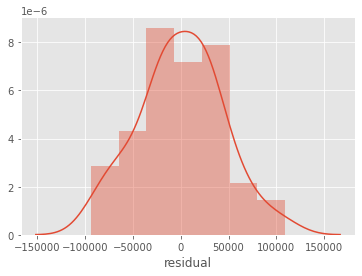

In [29]:
# Add new columns of predictions 
data['y_pred'] = pd.DataFrame(lm1.predict(X))
# Calculate error 
data['residual'] = data['Sales'] - data['y_pred']
# Plot histogram of errors
sns.distplot(data['residual'])
plt.show()

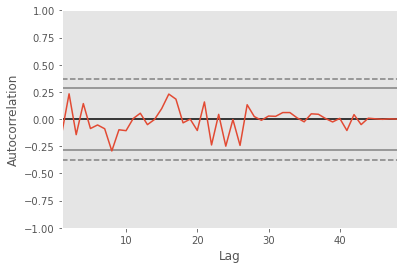

In [30]:
# Autocorelation plot 
from pandas.plotting import autocorrelation_plot
residuals =  data['Sales'] - data['y_pred']
residuals_df = pd.DataFrame(residuals)
autocorrelation_plot(residuals)
plt.show()